In [1]:
from memory.unsafe_pointer import UnsafePointer, initialize_pointee_copy, initialize_pointee_move  
  
# Allocate memory to hold a value  
var ptr = UnsafePointer[Int].alloc(1)  
# # Initialize the allocated memory  
# initialize_pointee_copy(ptr, 100)  
print(ptr[]) 
# Update an initialized value  
ptr[] += 10  
# Access an initialized value  
print(ptr[])  

106819520413736
106819520413746


### Testing Value & Grad

In [5]:
from engine import Value

var a = Value(2.0)
var b = Value(3.0)
var c: Float32 = 2.0
var d = b**c
var e = a + c
e.backward()

a.print() # => <Value data: 2.0 grad: 1.0 op:  >
b.print() # => <Value data: 3.0 grad: 0.0 op:  >
d.print() # => <Value data: 9.0 grad: 0.0 op: ** >
e.print() # => <Value data: 4.0 grad: 1.0 op: + > 

<Value data: Pointer[Float32] ->  2.0 grad: Pointer[Float32] ->  1.0 _op: StringRef ->   >
<Value data: Pointer[Float32] ->  3.0 grad: Pointer[Float32] ->  0.0 _op: StringRef ->   >
<Value data: Pointer[Float32] ->  9.0 grad: Pointer[Float32] ->  0.0 _op: StringRef ->  ** >
<Value data: Pointer[Float32] ->  4.0 grad: Pointer[Float32] ->  1.0 _op: StringRef ->  + >


### Testing Neuron

In [2]:
from engine import Value
from nn import Neuron

var neu: Neuron = Neuron(10, nonlin = False)
var x: Pointer[Pointer[Value]] = Pointer[Pointer[Value]].alloc(10)

for idx in range(10):
    var tmp: Pointer[Value] = Pointer[Value].alloc(1)
    tmp.store(Value(idx))
    x.store(idx, tmp)

neu.print()

var out_val = neu.forward(x)

var val = out_val.load()
val.print()

w is being prepped -  0
w is being prepped -  1
w is being prepped -  2
w is being prepped -  3
w is being prepped -  4
w is being prepped -  5
w is being prepped -  6
w is being prepped -  7
w is being prepped -  8
w is being prepped -  9
Linear  Neuron( 10 )
<Value data: Pointer[Float32] ->  -17.304969787597656 grad: Pointer[Float32] ->  0.0 _op: StringRef ->  + >


### Testing Layer

In [3]:
from engine import Value
from nn import Neuron, Layer

var lay: Layer = Layer(10, 2, nonlin = False)
var x: Pointer[Pointer[Value]] = Pointer[Pointer[Value]].alloc(10)

for idx in range(10):
    var tmp: Pointer[Value] = Pointer[Value].alloc(1)
    tmp.store(Value(idx))
    x.store(idx, tmp)

lay.print()

var out_val = lay.forward(x)

for idx in range(2):
    var tmp: Value = out_val.load(idx).load()
    tmp.print()

w is being prepped -  0
w is being prepped -  1
w is being prepped -  2
w is being prepped -  3
w is being prepped -  4
w is being prepped -  5
w is being prepped -  6
w is being prepped -  7
w is being prepped -  8
w is being prepped -  9
w is being prepped -  0
w is being prepped -  1
w is being prepped -  2
w is being prepped -  3
w is being prepped -  4
w is being prepped -  5
w is being prepped -  6
w is being prepped -  7
w is being prepped -  8
w is being prepped -  9
Layer | nin -  10  | nout -  2  | nonlin -  False  | parameter len -  22
<Value data: Pointer[Float32] ->  -0.032876014709472656 grad: Pointer[Float32] ->  0.0 _op: StringRef ->  + >
<Value data: Pointer[Float32] ->  -8.5430517196655273 grad: Pointer[Float32] ->  0.0 _op: StringRef ->  + >


### Testing MLP

In [4]:
from engine import Value
from nn import Neuron, Layer, MLP

var nouts: List[Int] = List[Int](16, 16, 1)
var mlp: MLP = MLP(2, nouts)
var x: Pointer[Pointer[Value]] = Pointer[Pointer[Value]].alloc(10)

for idx in range(10):
    var tmp: Pointer[Value] = Pointer[Value].alloc(1)
    tmp.store(Value(idx))
    x.store(idx, tmp)

mlp.print()

var out_val = mlp.forward(x)

for idx in range(1):
    var tmp: Value = out_val.load(idx).load()
    tmp.print()

w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  0
w is being prepped -  1
w is being prepped -  2
w is being prepped -  3
w is being prepped -  4
w is being prepped -  5
w is being prepped -  6
w is being prepped -  7
w is being prepped -  8
w is being prepp

### Dataset Visualization

Visualizing using PythonObject. Can visualize in mojo but that would require converting again in PythonObject for plt to work

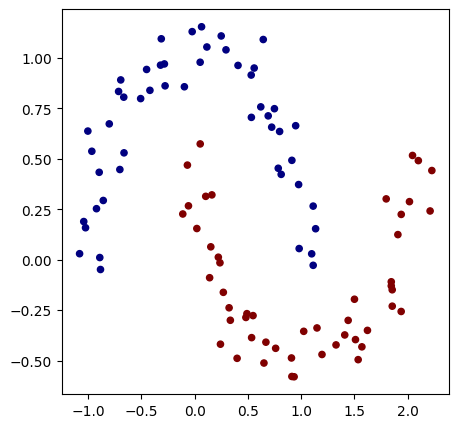

In [6]:
from python import Python
from engine import Value

var sklearn = Python.import_module("sklearn.datasets")
var numpy = Python.import_module("numpy")
var plt = Python.import_module("matplotlib.pyplot")
var out = sklearn.make_moons(100, noise = 0.1)
var n_samples = 100

var npy_X = out[0]
var npy_y = out[1]

var npy_X_0 = Python.list()
var npy_X_1 = Python.list()

for item in npy_X:
    npy_X_0.append(item[0])
    npy_X_1.append(item[1])

var npy_yl = Python.list()

for item in npy_y:
    npy_yl.append(item * 2 -1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(npy_X_0, npy_X_1, c=npy_yl, s=20, cmap='jet')
plt.show()